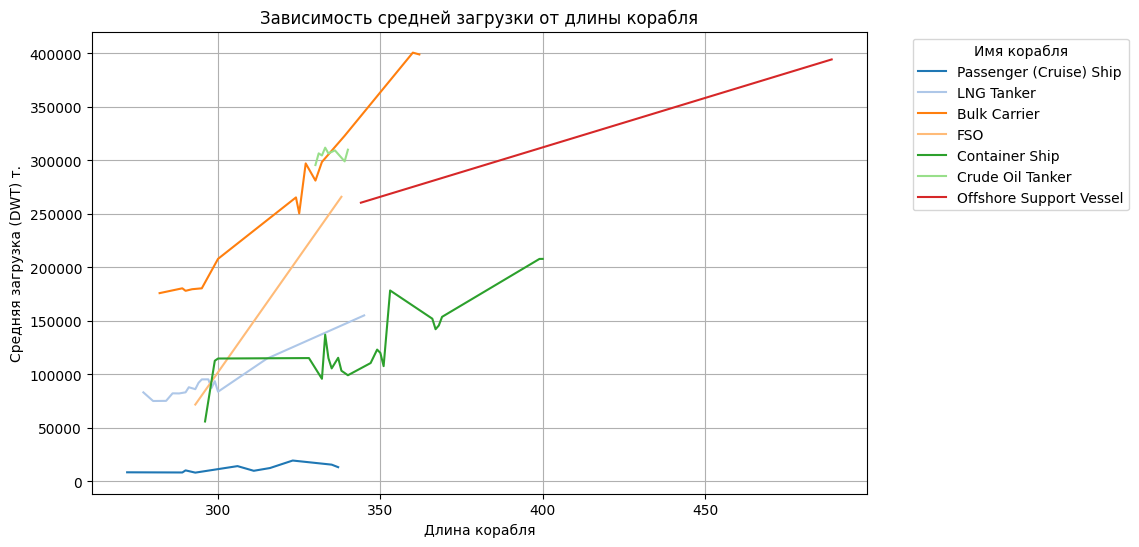

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Cleaned_ships_data.csv')

average_dwt = data.groupby(['length', 'ship_name'])['dwt'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=average_dwt, x='length', y='dwt', hue='ship_name', palette='tab20')

plt.title('Зависимость средней загрузки от длины корабля')
plt.xlabel('Длина корабля')
plt.ylabel('Средняя загрузка (DWT) т.')
plt.grid(True)

plt.legend(title='Имя корабля', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


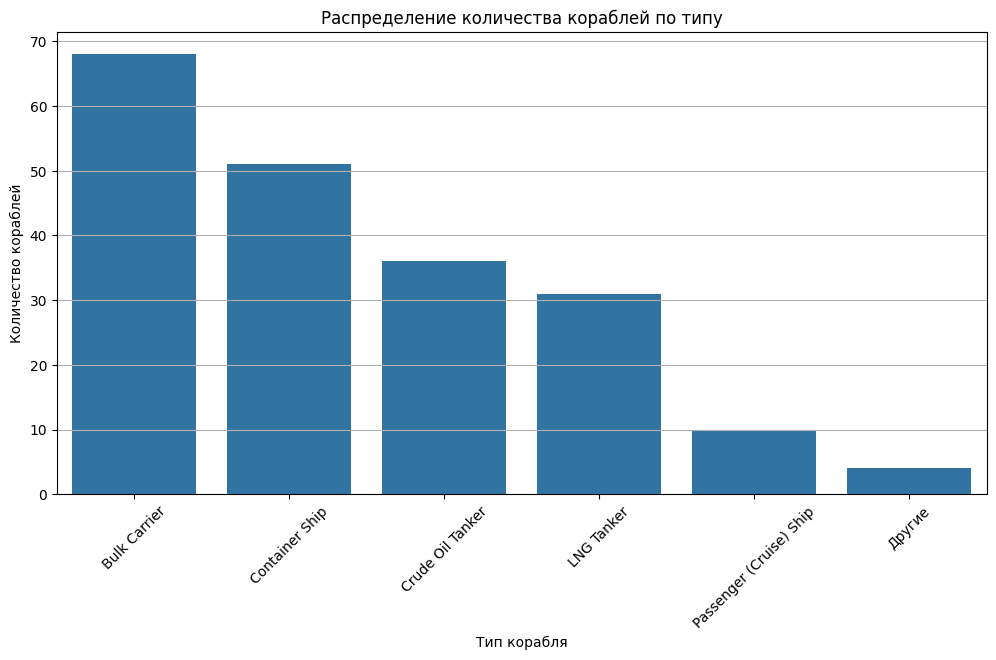

In [12]:
ship_counts = data['ship_name'].value_counts()

threshold = 5
ship_counts = ship_counts[ship_counts >= threshold]

other_count = data['ship_name'].value_counts()[data['ship_name'].value_counts() < threshold].sum()
ship_counts['Другие'] = other_count

plt.figure(figsize=(12, 6))
sns.barplot(x=ship_counts.index, y=ship_counts.values)

plt.title('Распределение количества кораблей по типу')
plt.xlabel('Тип корабля')
plt.ylabel('Количество кораблей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

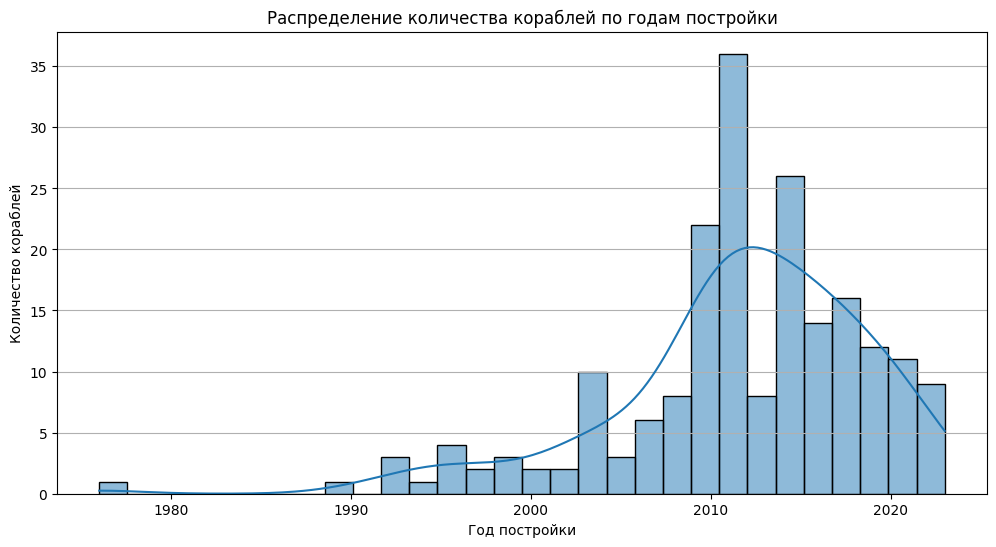

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data['built_year'], bins=30, kde=True)
plt.title('Распределение количества кораблей по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество кораблей')
plt.grid(axis='y')
plt.show()

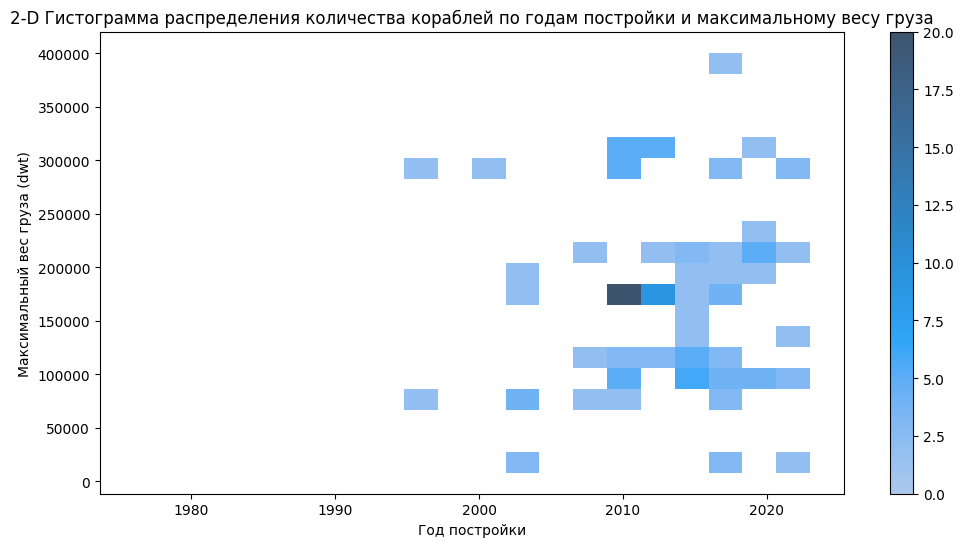

In [14]:
data = data.dropna(subset=['built_year', 'dwt'])

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='built_year', y='dwt', bins=20, pthresh=.1, cbar=True)

plt.title('2-D Гистограмма распределения количества кораблей по годам постройки и максимальному весу груза')
plt.xlabel('Год постройки')
plt.ylabel('Максимальный вес груза (dwt)')
plt.grid(False)
plt.show()